In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None

C:\Users\Aredio\AppData\Local\Temp\ipykernel_14908\2521322281.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Function to convert "mm:ss" to total seconds
def convert_time_to_seconds(time_str):
    """Convert mm:ss format to total seconds."""
    try:
        minutes, seconds = map(int, time_str.split(':'))
        return minutes * 60 + seconds
    except ValueError:
        # In case of any conversion error, return None or a default value
        return None


In [3]:
df = pd.read_csv("./answers.csv")

In [4]:
df.head()

User ID   Date of Experiment Time Start  \
0  198976a8-140e-4424-903a-1249780c295d  2024-02-06 11:07:55   11:07:55   
1  198976a8-140e-4424-903a-1249780c295d  2024-02-06 11:07:55   11:07:55   
2  198976a8-140e-4424-903a-1249780c295d  2024-02-06 11:07:55   11:07:55   
3  198976a8-140e-4424-903a-1249780c295d  2024-02-06 11:07:55   11:07:55   
4  198976a8-140e-4424-903a-1249780c295d  2024-02-06 11:07:55   11:07:55   

              Time End  Question Number Condition  Repetition  \
0  2024-02-06 11:23:09                1         J           1   
1  2024-02-06 11:23:09                1         J           2   
2  2024-02-06 11:23:09                1         J           3   
3  2024-02-06 11:23:09                1         D           1   
4  2024-02-06 11:23:09                1         D           2   

             Answer Time Taken Correct  
0  Graph 2 (orange)      01:17   FALSE  
1  Graph 2 (orange)      01:39    TRUE  
2    Graph 1 (blue)      02:04    TRUE  
3    Graph 1 (blue)      00:52    TRUE  
4    Graph 1 (blue)      00:27   FALSE

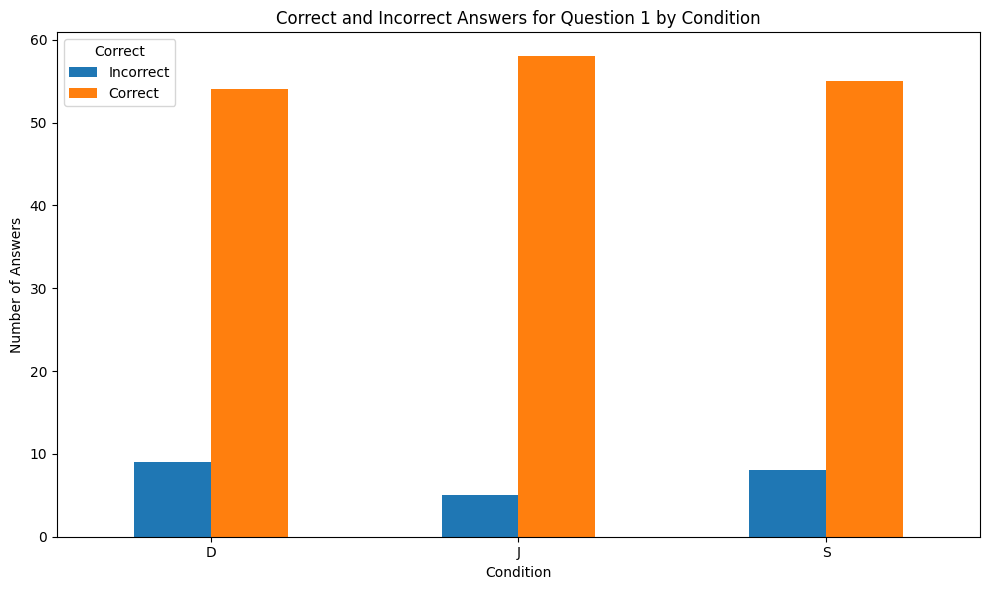

Correct    FALSE  TRUE
Condition             
D              9    54
J              5    58
S              8    55


In [5]:
# Filter the data for Question 1
question_1_df = df[df['Question Number'] == 1]

# Group the data by Condition and Correctness, and count the occurrences
grouped_df = question_1_df.groupby(['Condition', 'Correct']).size().unstack(fill_value=0)

grouped_df.plot(kind='bar', stacked=False, figsize=(10, 6))

plt.title('Correct and Incorrect Answers for Question 1 by Condition')
plt.xlabel('Condition')
plt.ylabel('Number of Answers')
plt.xticks(rotation=0)
plt.legend(title='Correct', labels=['Incorrect', 'Correct'])
plt.tight_layout()

plt.show()
print(grouped_df)

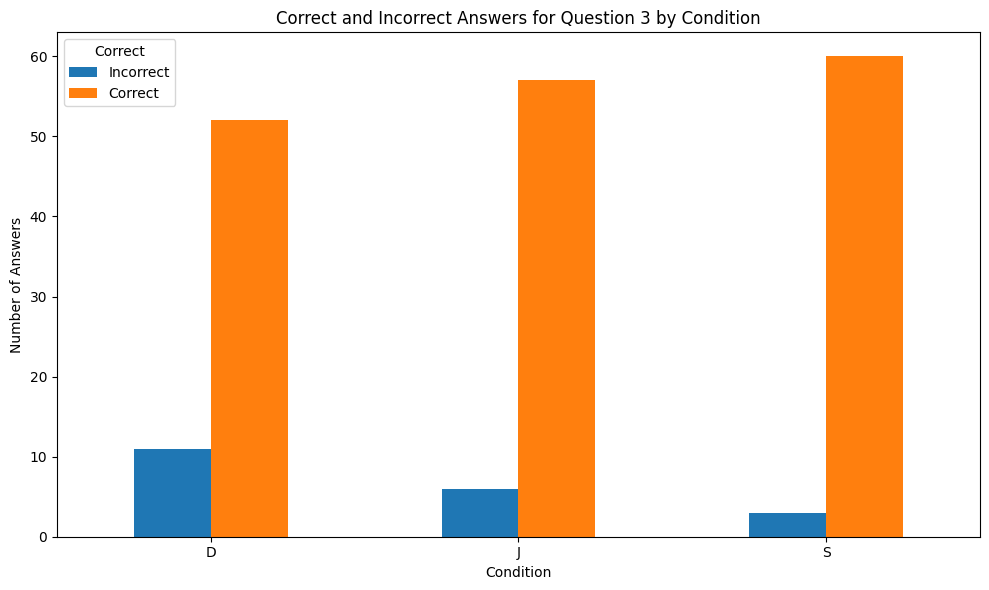

Correct    FALSE  TRUE
Condition             
D             11    52
J              6    57
S              3    60


In [6]:
# Filter the data for Question 1
question_3_df = df[df['Question Number'] == 3]

# Group the data by Condition and Correctness, and count the occurrences
grouped_df = question_3_df.groupby(['Condition', 'Correct']).size().unstack(fill_value=0)

grouped_df.plot(kind='bar', stacked=False, figsize=(10, 6))

plt.title('Correct and Incorrect Answers for Question 3 by Condition')
plt.xlabel('Condition')
plt.ylabel('Number of Answers')
plt.xticks(rotation=0)
plt.legend(title='Correct', labels=['Incorrect', 'Correct'])
plt.tight_layout()

plt.show()
print(grouped_df)

In [7]:
# Filter the data for Question 2
question_2_df = df[df['Question Number'] == 2]

# Convert Answer given to numeric values to calculate the mean
question_2_df['Answer'] = pd.to_numeric(question_2_df['Answer'], errors='coerce')

# Group the data by Condition and calculate the mean of the answers
mean_values_q2 = question_2_df.groupby('Condition')['Answer'].mean()


# Plotting the mean values for Question 2 by Condition
mean_values_q2.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange', 'green'])

plt.title('Mean Answer Values for Question 2 by Condition')
plt.xlabel('Condition')
plt.ylabel('Mean Answer Value')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


print(mean_values_q2)


Condition
D    3.603175
J    4.349206
S    3.619048
Name: Answer, dtype: float64


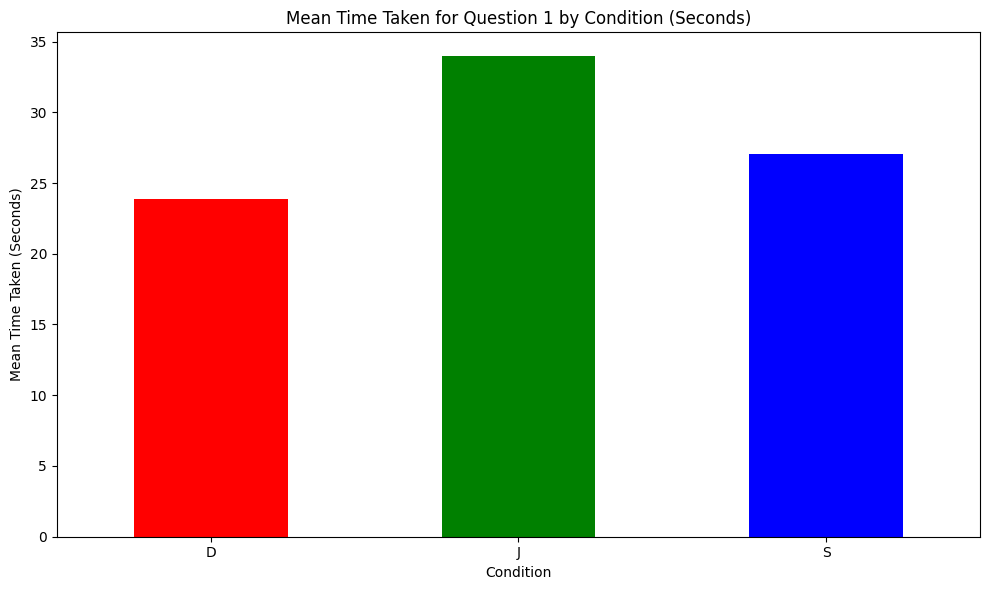

Condition
D    23.904762
J    33.952381
S    27.015873
Name: Time Taken Seconds, dtype: float64

In [8]:
# Apply the conversion to the "Time Taken" column
question_1_df['Time Taken Seconds'] = question_1_df['Time Taken'].apply(convert_time_to_seconds)

# Group by Condition and calculate the mean of "Time Taken Seconds"
mean_time_taken_q1 = question_1_df.groupby('Condition')['Time Taken Seconds'].mean()

# Plotting the mean time taken for Question 1 by Condition
mean_time_taken_q1.plot(kind='bar', figsize=(10, 6), color=['red', 'green', 'blue'])

plt.title('Mean Time Taken for Question 1 by Condition (Seconds)')
plt.xlabel('Condition')
plt.ylabel('Mean Time Taken (Seconds)')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()
mean_time_taken_q1

In [9]:
# Apply the conversion to the "Time Taken" column
question_2_df['Time Taken Seconds'] = question_2_df['Time Taken'].apply(convert_time_to_seconds)

# Group by Condition and calculate the mean of "Time Taken Seconds"
mean_time_taken_q2 = question_2_df.groupby('Condition')['Time Taken Seconds'].mean()

# Plotting the mean time taken for Question 1 by Condition
mean_time_taken_q2.plot(kind='bar', figsize=(10, 6), color=['red', 'green', 'blue'])

plt.title('Mean Time Taken for Question 2 by Condition (Seconds)')
plt.xlabel('Condition')
plt.ylabel('Mean Time Taken (Seconds)')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [10]:
# Apply the conversion to the "Time Taken" column
question_3_df['Time Taken Seconds'] = question_3_df['Time Taken'].apply(convert_time_to_seconds)

# Group by Condition and calculate the mean of "Time Taken Seconds"
mean_time_taken_q3 = question_3_df.groupby('Condition')['Time Taken Seconds'].mean()

# Plotting the mean time taken for Question 1 by Condition
mean_time_taken_q3.plot(kind='bar', figsize=(10, 6), color=['red', 'green', 'blue'])

plt.title('Mean Time Taken for Question 1 by Condition (Seconds)')
plt.xlabel('Condition')
plt.ylabel('Mean Time Taken (Seconds)')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

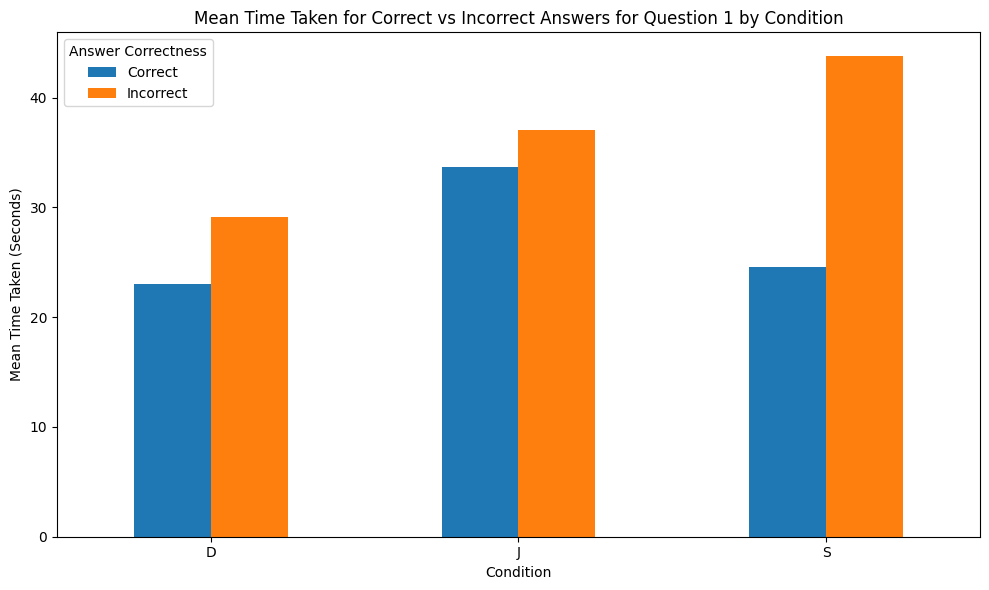

In [11]:
# Map "Correct" column to a more interpretable format
question_1_df['Correct Binary'] = question_1_df['Correct'].map({'TRUE': 'Correct', 'FALSE': 'Incorrect'})

# Group by Condition and Correctness, then calculate mean time taken
mean_time_by_correctness = question_1_df.groupby(['Condition', 'Correct Binary'])['Time Taken Seconds'].mean().unstack()

# Plotting the mean time taken for correct and incorrect answers for Question 1 by Condition
mean_time_by_correctness.plot(kind='bar', figsize=(10, 6))

plt.title('Mean Time Taken for Correct vs Incorrect Answers for Question 1 by Condition')
plt.xlabel('Condition')
plt.ylabel('Mean Time Taken (Seconds)')
plt.xticks(rotation=0)
plt.legend(title='Answer Correctness')
plt.tight_layout()

plt.show()

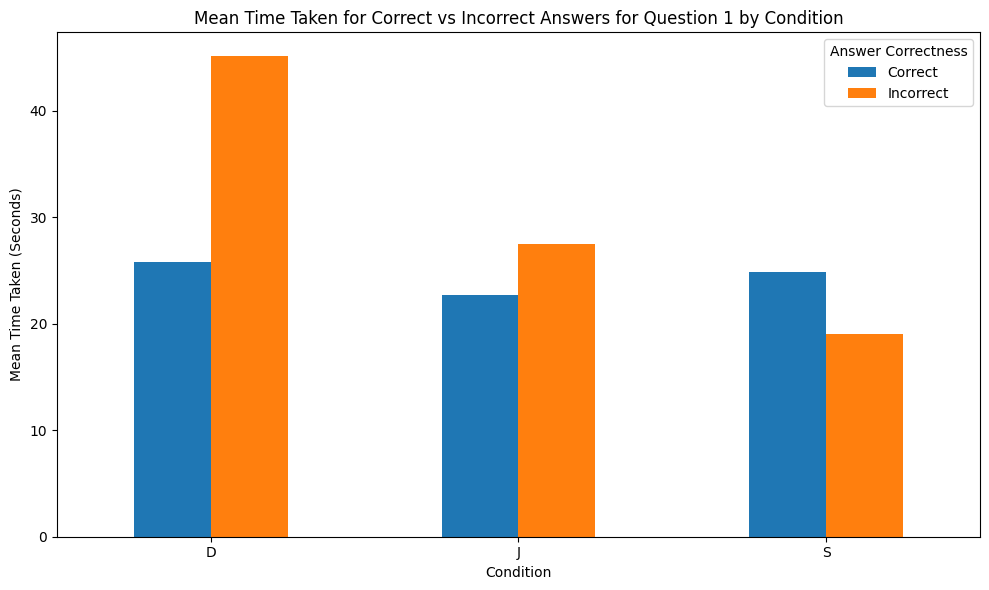

In [12]:
# Map "Correct" column to a more interpretable format
question_3_df['Correct Binary'] = question_3_df['Correct'].map({'TRUE': 'Correct', 'FALSE': 'Incorrect'})

# Group by Condition and Correctness, then calculate mean time taken
mean_time_by_correctness = question_3_df.groupby(['Condition', 'Correct Binary'])['Time Taken Seconds'].mean().unstack()

# Plotting the mean time taken for correct and incorrect answers for Question 1 by Condition
mean_time_by_correctness.plot(kind='bar', figsize=(10, 6))

plt.title('Mean Time Taken for Correct vs Incorrect Answers for Question 1 by Condition')
plt.xlabel('Condition')
plt.ylabel('Mean Time Taken (Seconds)')
plt.xticks(rotation=0)
plt.legend(title='Answer Correctness')
plt.tight_layout()

plt.show()

In [13]:
# Filter the data for question 1
data_q3 = data[data["Question Number"] == 1]

# Convert "Time Taken" to total seconds
data_q3["Time Taken Seconds"] = data_q3["Time Taken"].apply(lambda x: sum(x * int(t) for x, t in zip([60, 1], x.split(":"))))

# Convert "Correct" from string to boolean
data_q3["Correct"] = data_q3["Correct"].apply(lambda x: x.strip().upper() == "TRUE")

# Group by "Condition" and calculate the average time taken, count of correct, and incorrect answers
grouped_data = data_q3.groupby("Condition").agg(
    Average_Time=("Time Taken Seconds", "mean"),
    Correct_Count=("Correct", lambda x: (x == True).sum()),
    Incorrect_Count=("Correct", lambda x: (x == False).sum())
).reset_index()

# Setting up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Positions of the group bars
bar_width = 0.25
index = grouped_data.index
r1 = index
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Creating the bars
ax.bar(r1, grouped_data["Average_Time"], color='blue', width=bar_width, edgecolor='grey', label='Average Time (s)')
ax.bar(r2, grouped_data["Incorrect_Count"], color='red', width=bar_width, edgecolor='grey', label='Incorrect Answers')
ax.bar(r3, grouped_data["Correct_Count"], color='green', width=bar_width, edgecolor='grey', label='Correct Answers')

# Adding the labels and title
ax.set_xlabel('Condition', fontweight='bold')
ax.set_ylabel('Counts / Average Time (s)', fontweight='bold')
ax.set_title('Average Time Taken vs. Answer Correctness for Question 1 by Condition')
ax.set_xticks([r + bar_width for r in range(len(grouped_data))])
ax.set_xticklabels(grouped_data["Condition"])

# Creating a legend
ax.legend()

# Displaying the chart
plt.tight_layout()
plt.show()

grouped_data

NameError: name 'data' is not defined

: 

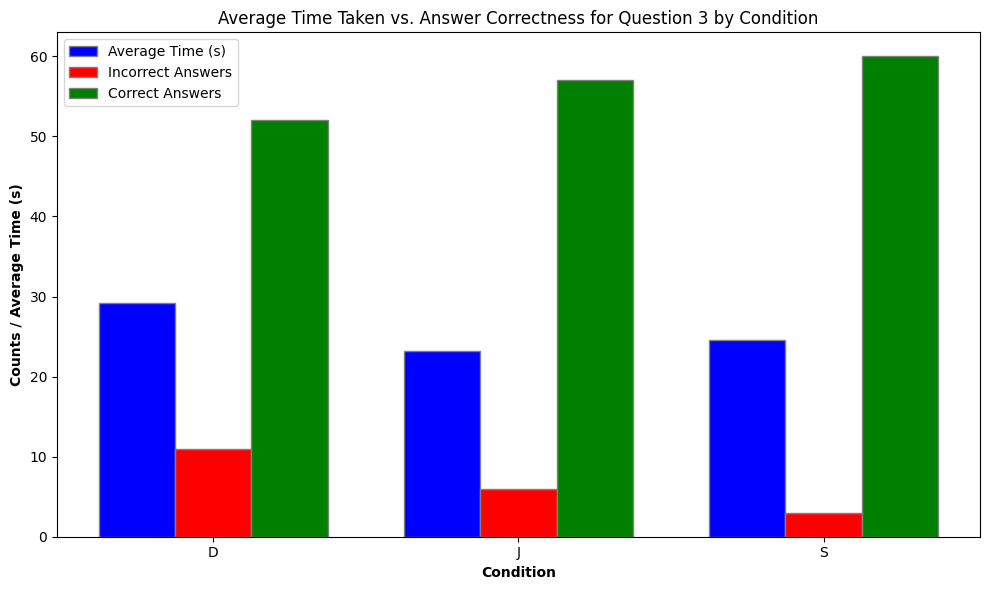

Condition  Average_Time  Correct_Count  Incorrect_Count
0         D     29.174603             52               11
1         J     23.174603             57                6
2         S     24.571429             60                3

In [ ]:

# Filter the data for question 1
data_q3 = data[data["Question Number"] == 3]

# Convert "Time Taken" to total seconds
data_q3["Time Taken Seconds"] = data_q3["Time Taken"].apply(lambda x: sum(x * int(t) for x, t in zip([60, 1], x.split(":"))))

# Convert "Correct" from string to boolean
data_q3["Correct"] = data_q3["Correct"].apply(lambda x: x.strip().upper() == "TRUE")

# Group by "Condition" and calculate the average time taken, count of correct, and incorrect answers
grouped_data = data_q3.groupby("Condition").agg(
    Average_Time=("Time Taken Seconds", "mean"),
    Correct_Count=("Correct", lambda x: (x == True).sum()),
    Incorrect_Count=("Correct", lambda x: (x == False).sum())
).reset_index()

# Setting up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Positions of the group bars
bar_width = 0.25
index = grouped_data.index
r1 = index
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Creating the bars
ax.bar(r1, grouped_data["Average_Time"], color='blue', width=bar_width, edgecolor='grey', label='Average Time (s)')
ax.bar(r2, grouped_data["Incorrect_Count"], color='red', width=bar_width, edgecolor='grey', label='Incorrect Answers')
ax.bar(r3, grouped_data["Correct_Count"], color='green', width=bar_width, edgecolor='grey', label='Correct Answers')

# Adding the labels and title
ax.set_xlabel('Condition', fontweight='bold')
ax.set_ylabel('Counts / Average Time (s)', fontweight='bold')
ax.set_title('Average Time Taken vs. Answer Correctness for Question 3 by Condition')
ax.set_xticks([r + bar_width for r in range(len(grouped_data))])
ax.set_xticklabels(grouped_data["Condition"])

# Creating a legend
ax.legend()

# Displaying the chart
plt.tight_layout()
plt.show()

grouped_data

In [ ]:
# Filter the data for question 2
data_q2 = data[data["Question Number"] == 2]

# Convert "Time Taken" to total seconds for question 2
data_q2["Time Taken Seconds"] = data_q2["Time Taken"].apply(lambda x: sum(x * int(t) for x, t in zip([60, 1], x.split(":"))))

# Convert "Correct" column to numerical values
data_q2["Correct Value"] = pd.to_numeric(data_q2["Correct"], errors='coerce')

# Group by "Condition" and calculate the average time taken and the mean of "Correct" values
grouped_data_q2 = data_q2.groupby("Condition").agg(
    Average_Time=("Time Taken Seconds", "mean"),
    Mean_Correct_Value=("Correct Value", "mean")
).reset_index()

grouped_data_q2

Condition  Average_Time  Mean_Correct_Value
0         D     24.555556            1.714286
1         J     27.857143            1.476190
2         S     26.936508            1.428571

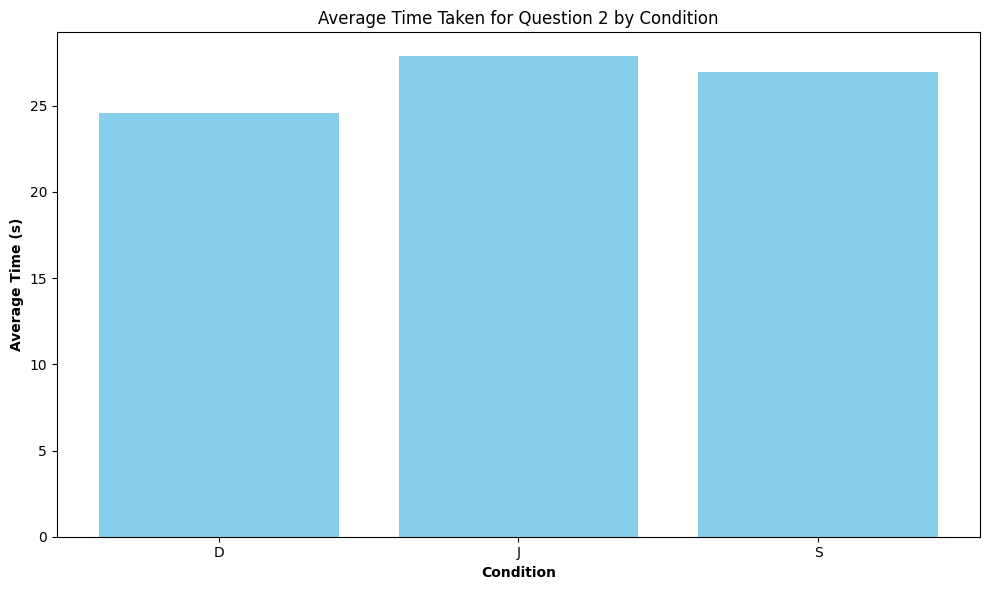

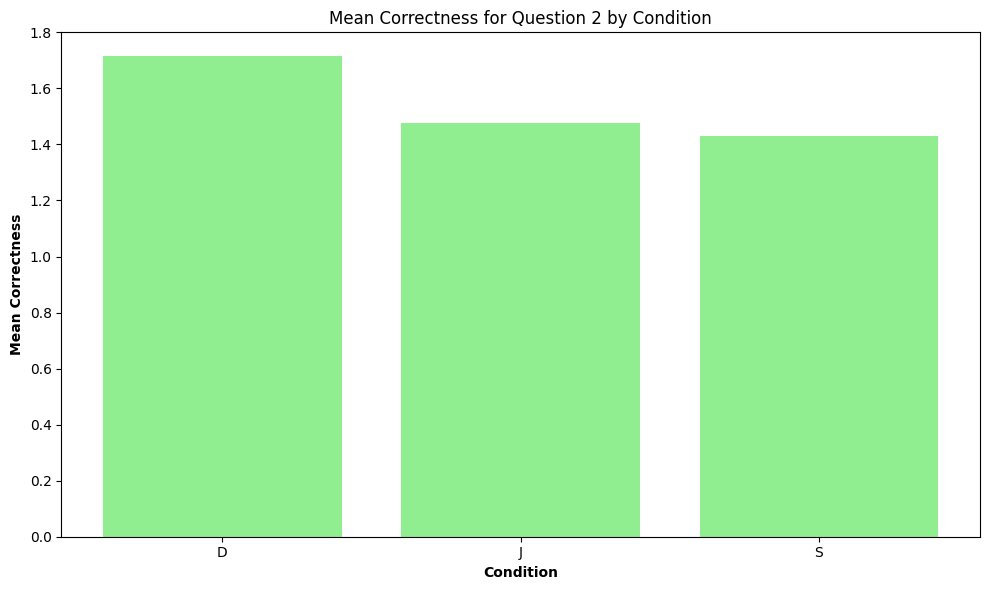

Condition  Average_Time  Mean_Correct
0         D     24.555556      1.714286
1         J     27.857143      1.476190
2         S     26.936508      1.428571

In [ ]:
# Filter the data for question 2
data_q2 = data[data["Question Number"] == 2]

# Convert "Time Taken" to total seconds for question 2
data_q2["Time Taken Seconds"] = data_q2["Time Taken"].apply(lambda x: sum(x * int(t) for x, t in zip([60, 1], x.split(":"))))

# Convert "Correct" to numeric values for question 2
data_q2["Correct"] = pd.to_numeric(data_q2["Correct"], errors='coerce')

# Group by "Condition" and calculate the average time taken and mean of "Correct" for question 2
grouped_data_q2 = data_q2.groupby("Condition").agg(
    Average_Time=("Time Taken Seconds", "mean"),
    Mean_Correct=("Correct", "mean")
).reset_index()
# Setting up the figure for the average time taken
fig, ax1 = plt.subplots(figsize=(10, 6))

# Creating the bar chart for the average time taken
ax1.bar(grouped_data_q2["Condition"], grouped_data_q2["Average_Time"], color='skyblue', label='Average Time (s)')

# Adding labels and title
ax1.set_xlabel('Condition', fontweight='bold')
ax1.set_ylabel('Average Time (s)', fontweight='bold')
ax1.set_title('Average Time Taken for Question 2 by Condition')

# Showing the first chart
plt.tight_layout()
plt.show()

# Setting up the figure for the mean of "Correct"
fig, ax2 = plt.subplots(figsize=(10, 6))

# Creating the bar chart for the mean of "Correct"
ax2.bar(grouped_data_q2["Condition"], grouped_data_q2["Mean_Correct"], color='lightgreen', label='Mean Correctness')

# Adding labels and title
ax2.set_xlabel('Condition', fontweight='bold')
ax2.set_ylabel('Mean Correctness', fontweight='bold')
ax2.set_title('Mean Correctness for Question 2 by Condition')

# Showing the second chart
plt.tight_layout()
plt.show()
grouped_data_q2